Define the function for stationary check(only p-value based)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = sns.load_dataset('flights')

In [16]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(dataFrame[var])
    p_value = adf_result[1]

    print(f'ADF p-value: {p_value:.4f}')
    if p_value < 0.05:
        print('The time series is not stationary(reject H0)')
    else:
        print('The time series is stationary  (fail to reject H0)')
    #plot
    plt.figure(figsize=(10,7))
    sns.lineplot(data=dataFrame, x=dataFrame.index, y=var, label='Original')
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollMean', label='Rolling Mean')
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollStd', label='Rolling Std')
    plt.title('Stationary Check using Rolling Mean and Std Deviation')
    plt.legend()
    plt.show()

Call the function to test stationarity

ADF p-value: 0.9919
The time series is stationary  (fail to reject H0)


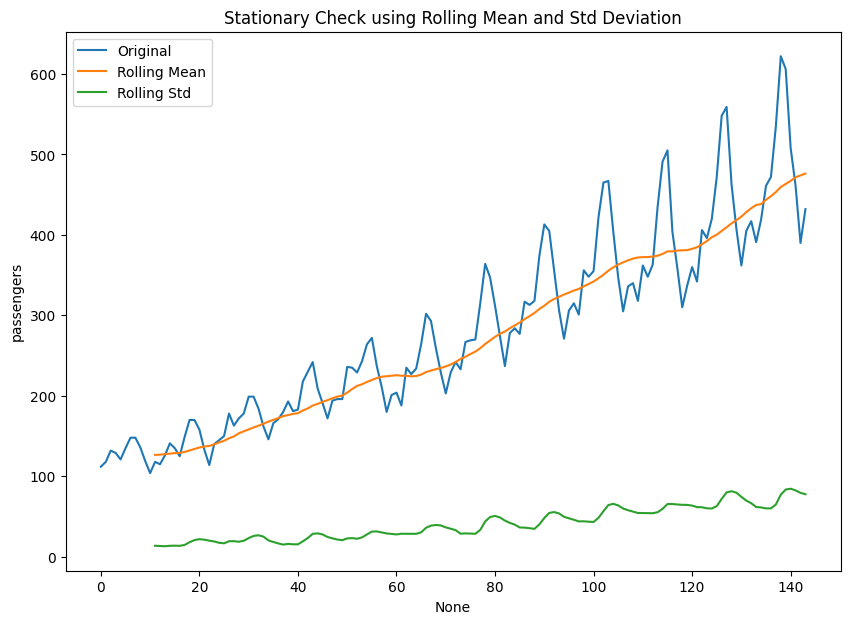

In [17]:
test_stationarity(df, 'passengers')

Just get the passengers column into a new dataframe for easier testing

In [18]:
air_df = df[['passengers']].copy()

In [19]:
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df.passengers - air_df['shift']
print(air_df.head(20))

    passengers  shift  shiftDiff
0          112    NaN        NaN
1          118  112.0        6.0
2          132  118.0       14.0
3          129  132.0       -3.0
4          121  129.0       -8.0
5          135  121.0       14.0
6          148  135.0       13.0
7          148  148.0        0.0
8          136  148.0      -12.0
9          119  136.0      -17.0
10         104  119.0      -15.0
11         118  104.0       14.0
12         115  118.0       -3.0
13         126  115.0       11.0
14         141  126.0       15.0
15         135  141.0       -6.0
16         125  135.0      -10.0
17         149  125.0       24.0
18         170  149.0       21.0
19         170  170.0        0.0


Test stationarity

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_14140\2990571357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_14140\2990571357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


ADF p-value: 0.0542
The time series is stationary  (fail to reject H0)


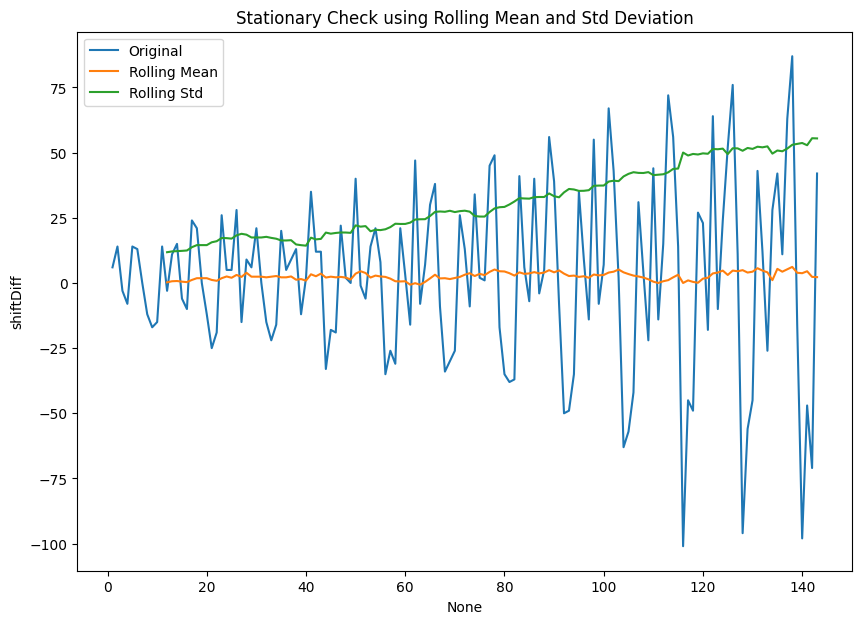

In [20]:
test_stationarity(air_df.dropna(), 'shiftDiff')

p-value is still > 0.05, so we cannot reject H0

Let us use shift of 2

In [23]:
air_df['shift'] = air_df.passengers.shift(2)
air_df['shiftDiff'] = air_df.passengers - air_df['shift']
print(air_df.head(20))

    passengers  shift  shiftDiff
0          112    NaN        NaN
1          118    NaN        NaN
2          132  112.0       20.0
3          129  118.0       11.0
4          121  132.0      -11.0
5          135  129.0        6.0
6          148  121.0       27.0
7          148  135.0       13.0
8          136  148.0      -12.0
9          119  148.0      -29.0
10         104  136.0      -32.0
11         118  119.0       -1.0
12         115  104.0       11.0
13         126  118.0        8.0
14         141  115.0       26.0
15         135  126.0        9.0
16         125  141.0      -16.0
17         149  135.0       14.0
18         170  125.0       45.0
19         170  149.0       21.0


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_14140\2990571357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_14140\2990571357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


ADF p-value: 0.0386
The time series is not stationary(reject H0)


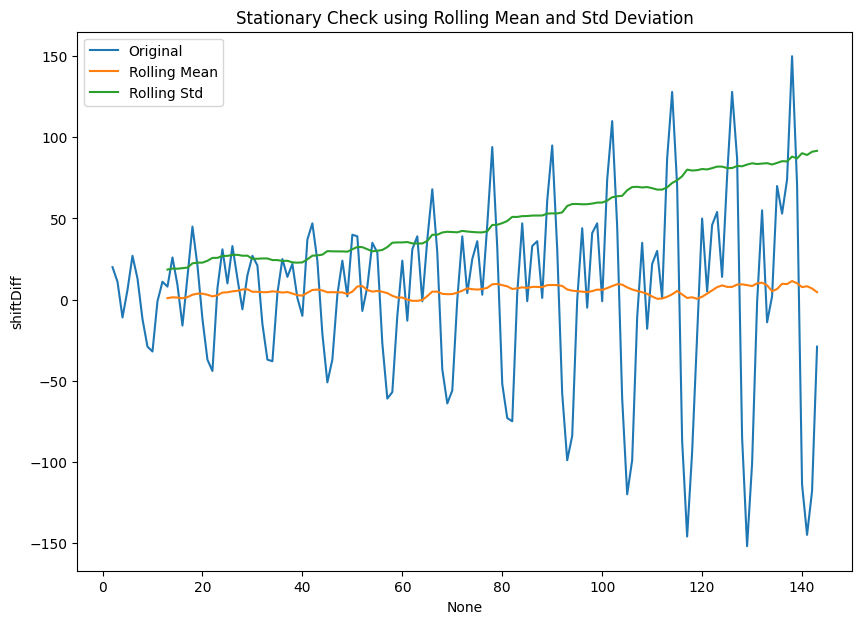

In [22]:
test_stationarity(air_df.dropna(), 'shiftDiff')

# Conclusion: The data has become somewhat stationary